<a href="https://colab.research.google.com/github/moreatharvaa/Iris-flower-species-classification-using-ML-Algorithms.ipynb/blob/main/Iris_flower_species_classification_using_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Iris dataset analysis - Classification**
Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1) sepal length in cm <br>
2) sepal width in cm <br>
3) petal length in cm <br>
4) petal width in cm

##**Import Modules**

In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

##**Loading the Dataset**

In [140]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##**Describe the Data**

In [117]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [118]:
#to display the basic info of the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [119]:
#to display the no of samples in each class

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##**Pre-processing the Dataset**

In [120]:
#check for the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##**Exploring Data Analysis**

<Axes: >

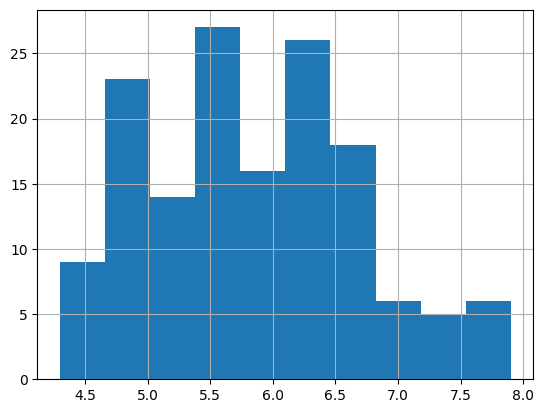

In [121]:
#histograms
df['SepalLengthCm'].hist()

<Axes: >

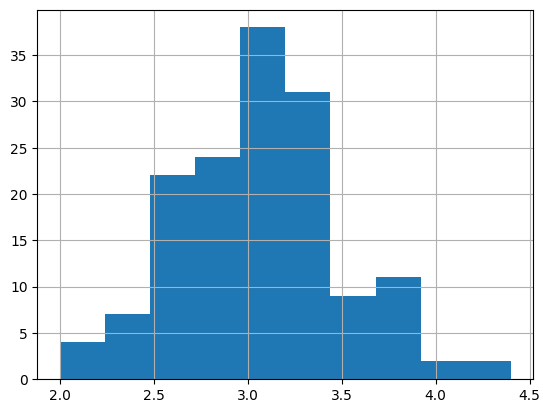

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

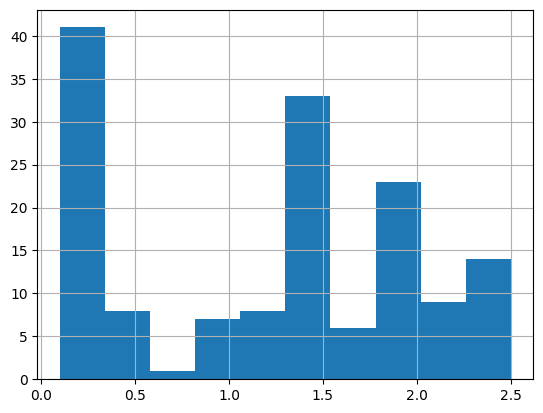

In [ ]:
df['PetalWidthCm'].hist()

<Axes: >

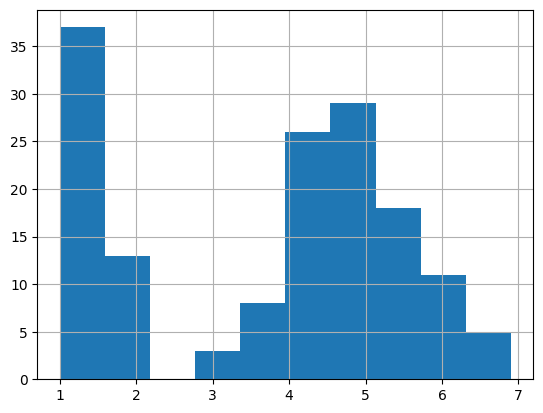

In [ ]:
df['PetalLengthCm'].hist()

In [123]:
#scatterplot

colors = ['red', 'green', 'blue']
species = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']


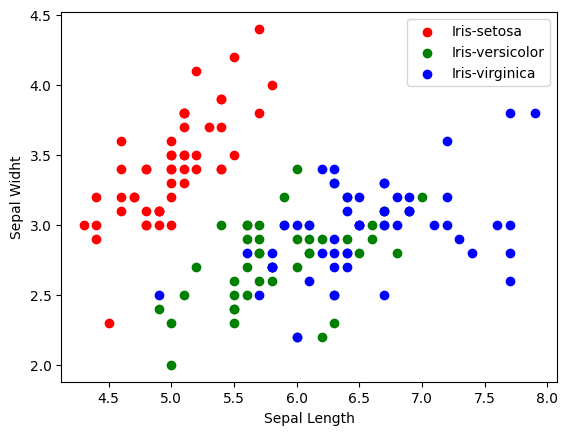

In [122]:
for i in range(3):
   x = df[df['Species'] == species[i]]
   plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Widht")
plt.legend()


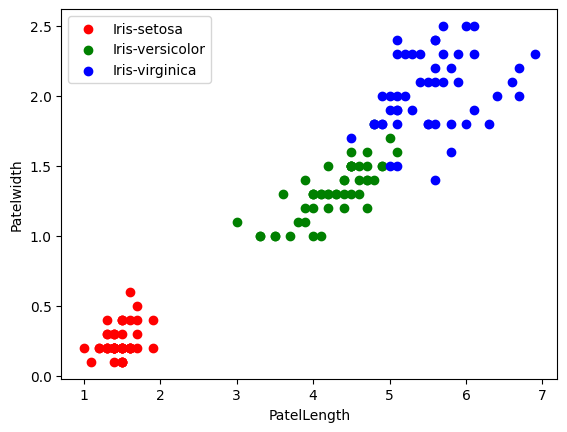

In [124]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])

plt.xlabel('PatelLength')
plt.ylabel("Patelwidth")
plt.legend()

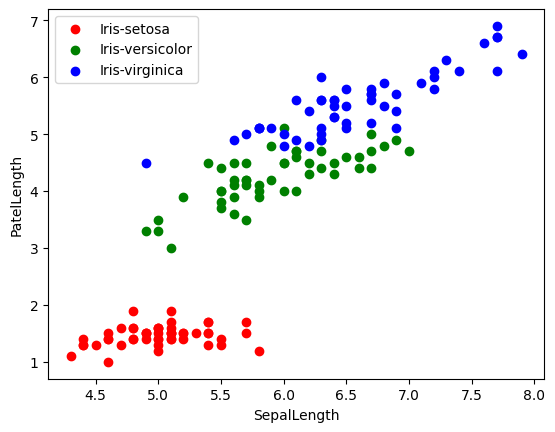

In [125]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])

plt.xlabel("SepalLength")
plt.ylabel("PatelLength")
plt.legend()

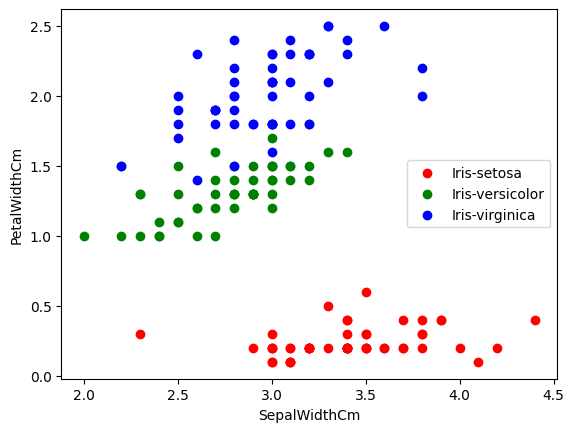

In [ ]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])

plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

## **Coorelation Matrix**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [126]:
df.corr()

<ipython-input-126-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<ipython-input-127-99c8497b7cd8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

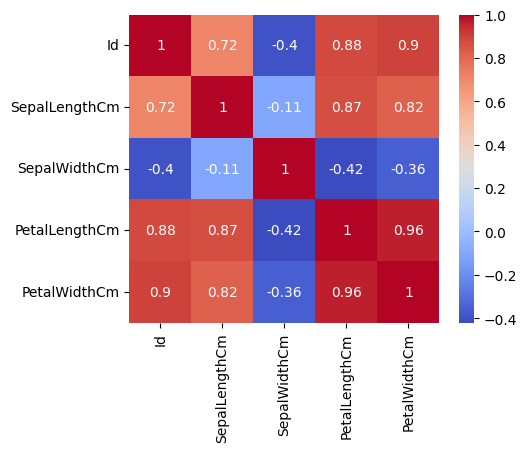

In [127]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

##**Label Coder**

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [129]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


##**Model Training**

In [130]:
from sklearn.model_selection import train_test_split
# train - 80
# test - 20
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [110]:
###
len(x_train)


120

In [111]:
###
len(x_test)

30

In [131]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [132]:
# model training
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [133]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [134]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [135]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [136]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [137]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [138]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [139]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0
